### Exercises

#### Question 1

Alongside this notebook is a file `daily_quotes.csv` (the same one that we used for the Pandas exercises).

Using this data write a function that generates a composite of line charts (2 columns wide), that charts the closing price for each symbol in the data.

             Date  Close/Last
Symbol                       
AAPL   2021-02-12      135.37
AMZN   2021-02-12     3277.71
GOOG   2021-02-12     2104.11
MSFT   2021-02-12      244.99
AAPL   2021-02-11      135.13
...           ...         ...
MSFT   2020-08-14      208.90
AAPL   2020-08-13      115.01
AMZN   2020-08-13     3161.02
GOOG   2020-08-13     1518.45
MSFT   2020-08-13      208.70

[508 rows x 2 columns]


/var/folders/pf/d9drpyq52kq7wff3pflcr1ch0000gn/T/ipykernel_39402/4166199647.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


(array([18506., 18536., 18567., 18597., 18628., 18659.]),
 [Text(18506.0, 0, '2020-09'),
  Text(18536.0, 0, '2020-10'),
  Text(18567.0, 0, '2020-11'),
  Text(18597.0, 0, '2020-12'),
  Text(18628.0, 0, '2021-01'),
  Text(18659.0, 0, '2021-02')])

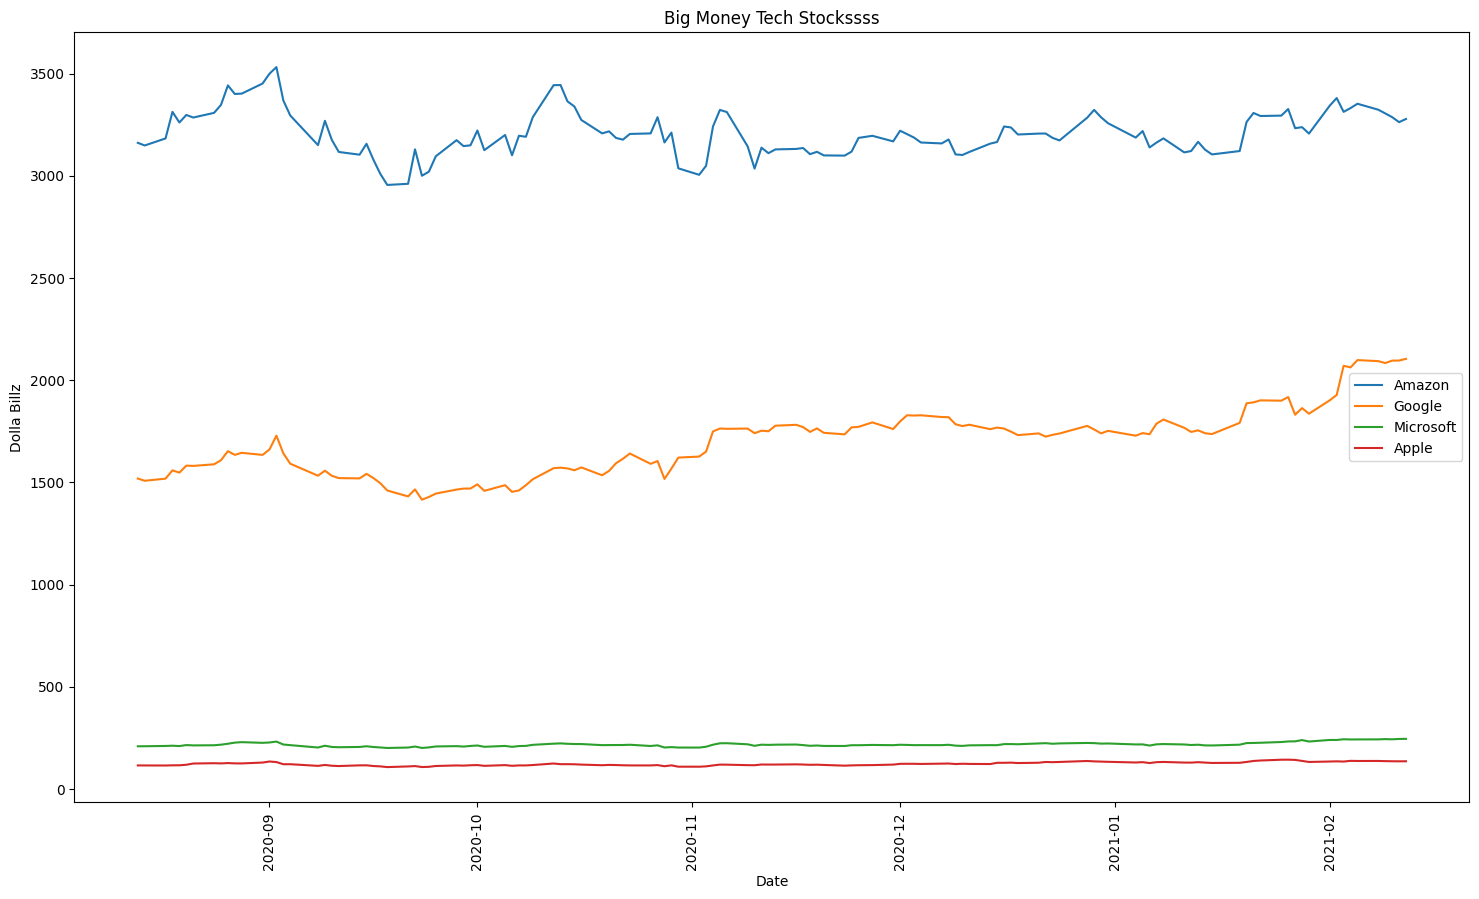

In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Import / clean data

df = pd.read_csv(
    'daily_quotes.csv',
    index_col = 0,
    skipinitialspace = True,
    usecols = ['Symbol','Date', 'Close/Last'],
    parse_dates = ['Date']
                )
# print(df.info())
print(df)

# print(df.loc['AAPL']['Date'].values)

x_pts = df.loc['AAPL']['Date'].values
y_pts_AAPL = df.loc['AAPL']['Close/Last'].values
y_pts_GOOG = df.loc['GOOG']['Close/Last'].values
y_pts_AMZN = df.loc['AMZN']['Close/Last'].values
y_pts_MSFT = df.loc['MSFT']['Close/Last'].values

plt.rcParams['figure.figsize'] = [18, 10]
fig, ax = plt.subplots()

ax.plot(x_pts, y_pts_AMZN, label = 'Amazon')
ax.plot(x_pts, y_pts_GOOG, label = 'Google')
ax.plot(x_pts, y_pts_MSFT, label = 'Microsoft')
ax.plot(x_pts, y_pts_AAPL, label = 'Apple')

ax.set_title("Big Money Tech Stockssss")
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Dolla Billz')
ax.tick_params(axis='x', which='minor', bottom=True)

plt.xticks(rotation=90)







AttributeError: 'numpy.ndarray' object has no attribute 'rolling'

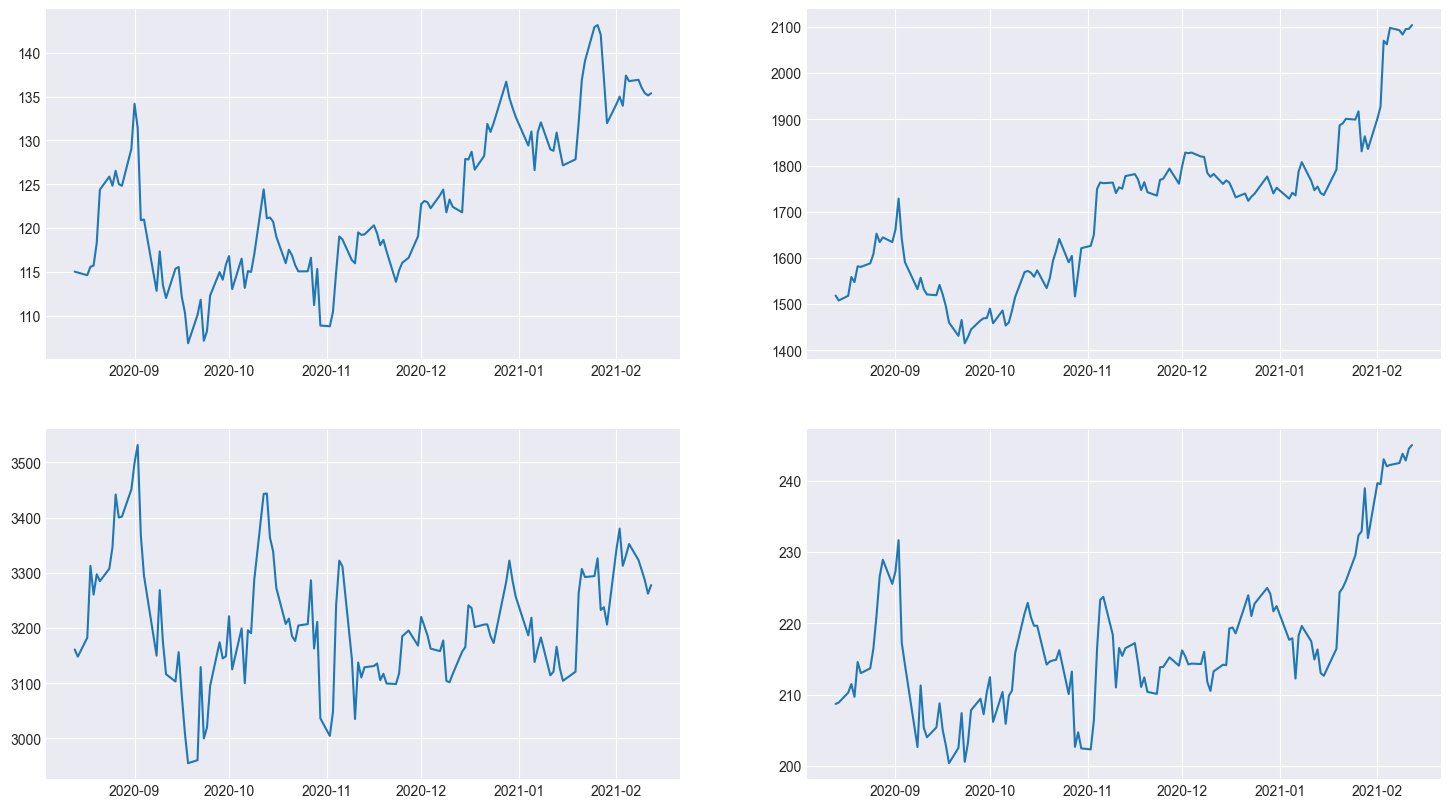

In [40]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def import_and_parse_csv(csv_name):
    df = pd.read_csv(
    csv_name,
    header = 0,
    index_col = 0,
    skipinitialspace = True,
    usecols = ['Symbol','Date', 'Close/Last'],
    parse_dates = ['Date']
    )
    print(f'{csv_name} imported')
    return df
        
def set_style_and_size(style_name, size_arr):
    mpl.style.use(style_name)
    plt.rcParams['figure.figsize'] = size_arr
    print(f'Style set to {style_name} with size {size_arr}')
        
syms = ['AAPL', 'GOOG', 'AMZN', 'MSFT']

def get_x_pts(col_name):
    return df.loc['AAPL'][col_name].values
        
def get_y_pts(sym):
    return df.loc[sym]['Close/Last'].values
        
def plot_syms(sym_arr, frame, rolling_avg = False):
    fig, axes = plt.subplots(2,2)
    x_pts = df.loc['AAPL']['Date'].values
    [ ax.plot(x_pts, get_y_pts(sym), label = sym ) for ax,sym in zip(axes.reshape(4), sym_arr)]
    if rolling_avg is not False:
        [ ax.plot(x_pts, get_y_pts(sym).rolling(window = rolling_avg).mean()) for ax,sym in zip(axes.reshape(4), sym_arr)]    
plot_syms(syms, df, rolling_avg = 5)


### Question 2

Expand on your previous function to include an `n`-day moving average on each chart. (When you calculate the moving average, be careful with the order of the data in each subset of data).

#### Question 3

Using the previous charts, add horizontal lines for the 25th, 50th and 75th percentiles of the close price (calculated over the entire time period).